# More about the fundamental metallicity relation

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import PIL
%matplotlib inline

from IPython.display import display

PATH = os.path.abspath('..')

In [2]:
mad = lambda x: np.median(np.abs(x - np.median(x)))

def nmad(z, const=1.4826):
    """Returns the Gaussian sigma according to MAD"""
    return const*mad(z)

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

# define colors
c_nmad = '#8888ed'
c_median = '#ce1504'
c_rmse = '#ce1504'

In [22]:
metals = pd.read_csv(f'{PATH}/catalogs/predictions-oh_p50.csv', index_col=0)
full = pd.read_csv(f'{PATH}/catalogs/SDSSspecgalsDR14_boada.csv')[['objID', 'oh_p50', 'lgm_tot_p50', 'sfr_tot_p50']]
full.set_index('objID', inplace=True)

In [23]:
df2 = metals.join(full.drop('oh_p50', axis='columns'), how='left')
df2 = df2[df2.lgm_tot_p50 > 0]
df2.head()

,oh_p50,prediction,lgm_tot_p50,sfr_tot_p50
objID,,,,
1237648672922206684,8.676655,8.749094,9.433080,0.045122
1237648673431879906,8.915661,9.014692,10.499040,0.293388
1237648673458028997,8.824834,8.938385,9.694625,0.140291
1237648673459470810,8.598277,8.604225,9.311505,-0.456691
1237648673994768731,8.486758,8.615976,9.260650,-0.952921


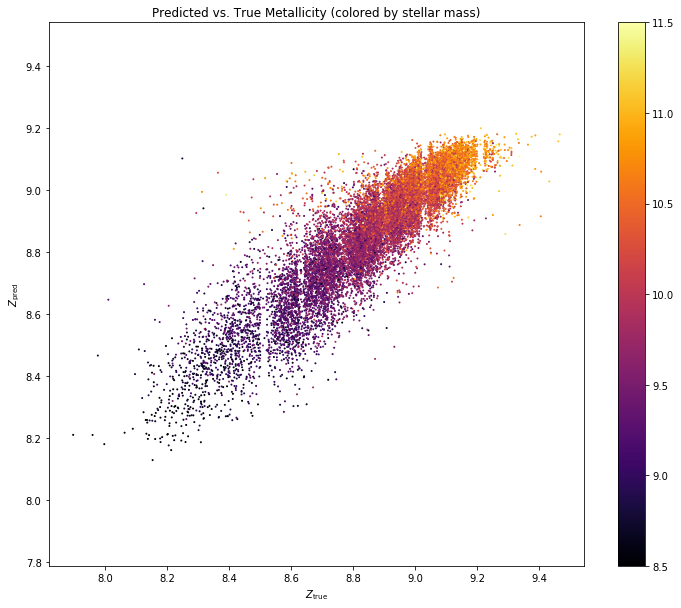

In [28]:
plt.figure(figsize=(12, 10))
plt.scatter(x='oh_p50', y='prediction', c='lgm_tot_p50', s=1, data=df2, cmap='inferno', vmin=8.5, vmax=11.5)
plt.colorbar()
plt.xlabel(r'$Z_{\rm true}$')
plt.ylabel(r'$Z_{\rm pred}$')
plt.axis('equal')
plt.title('Predicted vs. True Metallicity (colored by stellar mass)');

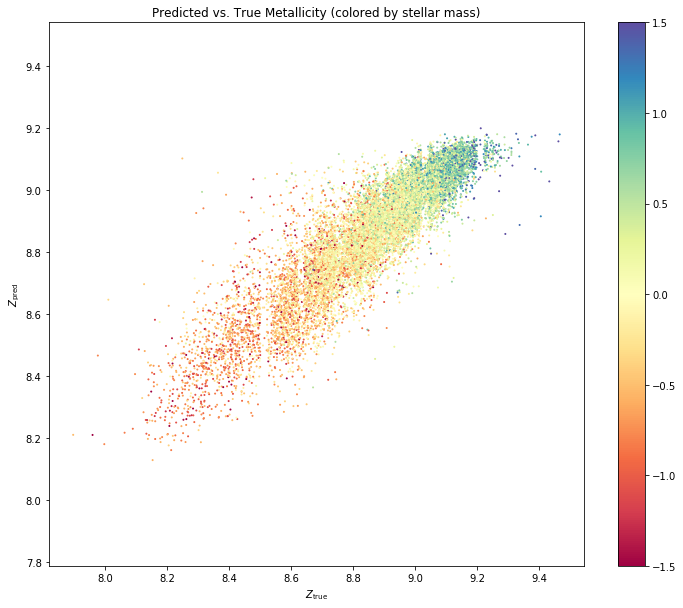

In [32]:
plt.figure(figsize=(12, 10))
plt.scatter(x='oh_p50', y='prediction', c='sfr_tot_p50', s=1, data=df2, cmap='Spectral', vmin=-1.5, vmax=1.5)
plt.colorbar()
plt.xlabel(r'$Z_{\rm true}$')
plt.ylabel(r'$Z_{\rm pred}$')
plt.axis('equal')
plt.title('Predicted vs. True Metallicity (colored by stellar mass)');

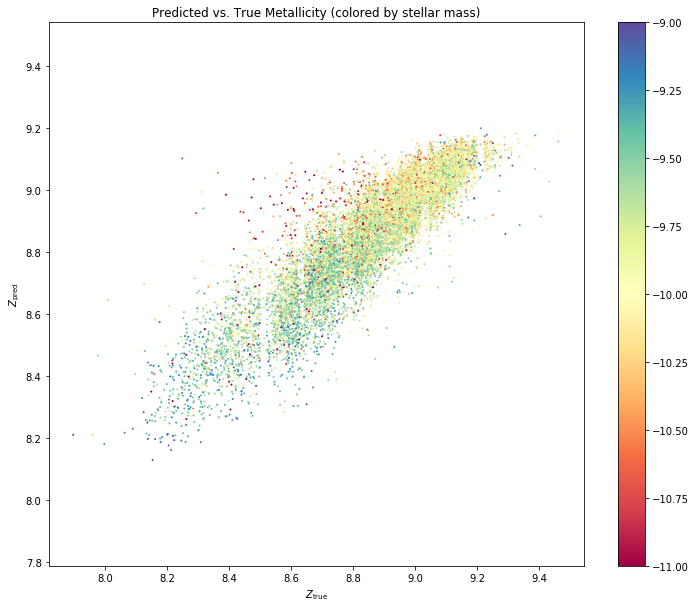

In [36]:
df2['sSFR'] = df2.sfr_tot_p50 - df2.lgm_tot_p50

plt.figure(figsize=(12, 10))
plt.scatter(x='oh_p50', y='prediction', c='sSFR', s=1, data=df2, cmap='Spectral', vmin=-11, vmax=-9)
plt.colorbar()
plt.xlabel(r'$Z_{\rm true}$')
plt.ylabel(r'$Z_{\rm pred}$')
plt.axis('equal')
plt.title('Predicted vs. True Metallicity (colored by stellar mass)');

# Results

Is it possible that the sSFR correlates more strongly with light distribution than either SFR or $M_\star$?

Consider the quantity shown by the marker colors, let's just say sSFR. Can we interpret vertical striping as a correlation between $Z_{\rm true}$ and the sSFR, and horizontal striping as a correlation between $Z_{\rm pred}$, aka color/light distribution/morphology, and sSFR?
If so, then by eye, it looks like:
* $M_\star$ correlates more with $Z_{\rm pred}$ than $Z_{\rm true}$
* SFR correlates more with $Z_{\rm true}$ than $Z_{\rm pred}$
* sSFR correlates more with $Z_{\rm pred}$ than $Z_{\rm true}$

In [51]:
dz = 0.02
zrange = np.arange(8.0, 9.4, dz)

sSFR_grid = np.zeros((len(zrange), len(zrange)))

for i, zt in enumerate(zrange):
    for j, zp in enumerate(zrange):
        sSFR_grid[j, i] = np.average(df2[(df2.prediction > zp-dz/2) & (df2.prediction < zp+dz/2) &
                                        (df2.oh_p50 > zt-dz/2) & (df2.oh_p50 < zt+dz/2)].sSFR)

/home/jw740/anaconda3/envs/fastai/lib/python3.6/site-packages/numpy/lib/function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/jw740/anaconda3/envs/fastai/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


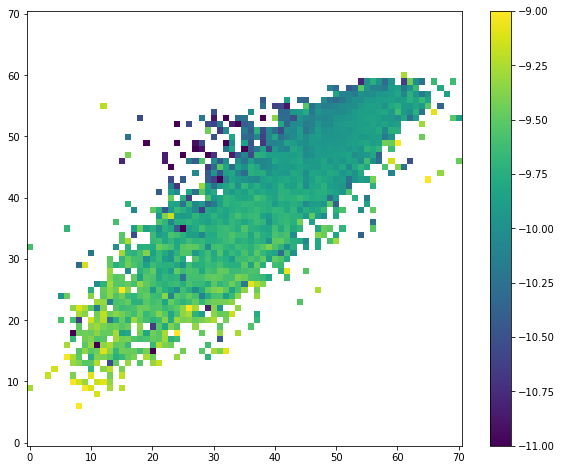

In [52]:
plt.figure(figsize=(10, 8))
plt.imshow(sSFR_grid, origin='lower', vmin=-11, vmax=-9)
plt.colorbar()